# **Disaster Tweet Classification using NLP**
---

##  Importing libraries and required modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import HTML
!pip install chart_studio
!pip install cufflinks
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Reading and preparation of data

Reading [data](https://www.kaggle.com/c/nlp-getting-started/data) and choosing important columns using [pandas](https://pandas.pydata.org/)

In [3]:
data = pd.read_csv('train_data_cleaning.csv')

In [4]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1
5,8,NaN,NaN,# Rocky Fire Update = > California Hwy . ...,1
6,10,NaN,NaN,# flood # disaster Heavy rain causes flash f...,1
7,13,NaN,NaN,I am on top of the hill and I can see a fire i...,1
8,14,NaN,NaN,There is an emergency evacuation happening now...,1
9,15,NaN,NaN,I am afraid that the tornado is coming to our ...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
data = data[['text','target']]
data.head()

,text,target
0,Our Deeds are the Reason of this # earthquake...,1
1,Forest fire near La Ronge Sask . Canada,1
2,All residents asked to ' shelter in place ' ...,1
3,"13,000 people receive # wildfires evacuation ...",1
4,Just got sent this photo from Ruby # Alaska a...,1


##  Data Exploration

##  Visualising counts of real and fake tweets

In [7]:
fig = px.bar(x=["0","1"], y=data["target"].value_counts(),color=["red", "goldenrod"])

#Change this value for bar widths
for dt in fig.data:
    dt["width"] = 0.4 

fig.update_layout(
    title_text = "Counts for Disaster and Non-Disaster Tweets",
    title_x=0.5,
    width=800,
    height=550,
    xaxis_title="Targets",
    yaxis_title="Count",
    showlegend=False
).show()

# py.plot(fig,filename='Counts for Disaster and Non-Disaster Tweets',auto_open=False,show_link=False)


<div>
    <a href="https://plotly.com/~raklugrin01/1/?share_key=hgjA8Zkl35RjZtywNHe0jm" target="_blank" title="Counts for Disaster and Non-Disaster Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/1.png?share_key=hgjA8Zkl35RjZtywNHe0jm" alt="Counts for Disaster and Non-Disaster Tweets" style="max-width: 100%;width: 1000px;"  width="1000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:1" sharekey-plotly="hgjA8Zkl35RjZtywNHe0jm" src="https://plotly.com/embed.js" async></script>
</div>

##  Visualising lengths of tweets

In [8]:
from plotly.subplots import make_subplots

word_len_dis = data[data['target']==1]['text'].str.split().map(lambda x : len(x))

word_len_non_dis = data[data['target']==0]['text'].str.split().map(lambda x : len(x))

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
            go.Histogram(x=word_len_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=1
).add_trace(
            go.Histogram(x=word_len_non_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=2
).update_layout(title_text="Length of words in Tweets",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Length of words in Tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/3/?share_key=c65IIAyuBQBfgU1Rfovdfb" target="_blank" title="Length of words in Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/3.png?share_key=c65IIAyuBQBfgU1Rfovdfb" alt="Length of words in Tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:3" sharekey-plotly="c65IIAyuBQBfgU1Rfovdfb" src="https://plotly.com/embed.js" async></script>
</div>


## Visualising average word lengths of tweets

In [9]:
def avgwordlen(strlist):
    sum=[]
    for i in strlist:
        sum.append(len(i))
    return sum

avgword_len_dis = data[data['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

avgword_len_non_dis = data[data['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], group_labels, bin_size=.2, colors=colors,)

fig.update_layout(title_text="Average word length in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show()

# py.plot(fig,filename='Average word length in tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/5/?share_key=tfNQPMyUblqOh7JL1sEiqW" target="_blank" title="Average word length in tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/5.png?share_key=tfNQPMyUblqOh7JL1sEiqW" alt="Average word length in tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:5" sharekey-plotly="tfNQPMyUblqOh7JL1sEiqW" src="https://plotly.com/embed.js" async></script>
</div>


##  Visualising most common stop words in the text data

In [10]:
def create_corpus(target):
    corpus = []
    for i in data[data['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

In [11]:
values_list = []

def analyze_stopwords(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        dic[word] += 1
    
    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[1],y=values_list[0],orientation='h',marker=dict(color= 'rgba(152, 255, 74,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[3],y=values_list[2],orientation='h',marker=dict(color= 'rgba(255, 143, 92,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top stop words in the text",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top stop words in the text',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/13/?share_key=icoxxtajqMGbKIizrTLUX0" target="_blank" title="Top stop words in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/13.png?share_key=icoxxtajqMGbKIizrTLUX0" alt="Top stop words in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:13" sharekey-plotly="icoxxtajqMGbKIizrTLUX0" src="https://plotly.com/embed.js" async></script>
</div>

## Data Cleaning

In [12]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

data["Cleaned_text"] = data["text"].apply(preprocess_data)

## Displaying Cleaned Data 

In [13]:
data.head()

,text,target,Cleaned_text
0,Our Deeds are the Reason of this # earthquake...,1,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask . Canada,1,forest fire near rong sask canada
2,All residents asked to ' shelter in place ' ...,1,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive # wildfires evacuation ...",1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby # Alaska a...,1,got sent photo rubi alaska smoke wildfir pour ...


#  Extra Data Exploration and Analysis on Cleaned Text

In [14]:
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()
    
data_disaster = data[data['target'] == 1]
data_non_disaster = data[data['target'] == 0]

##  Visualising words inside Real Disaster Tweets

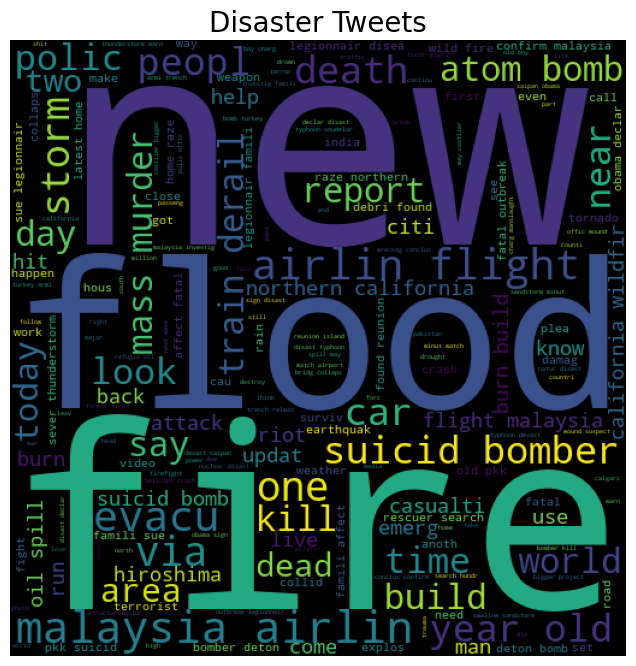

In [15]:
wordcloud(data_disaster,"Disaster Tweets")

##  Visualising words inside Fake Disaster Tweets

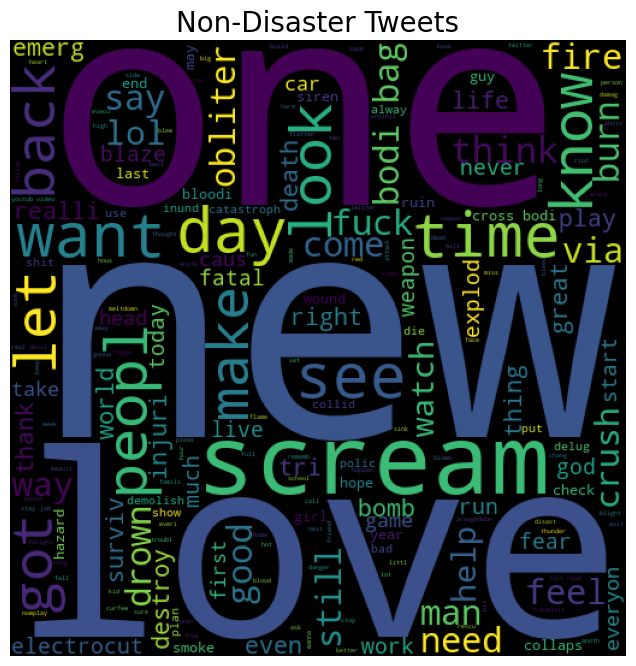

In [16]:
wordcloud(data_non_disaster,"Non-Disaster Tweets")

## Removing unwanted words with high frequency

In [17]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data["Cleaned_text"] = data["Cleaned_text"].apply(text_cleaning)

##  Analysing top 10 N-grams where N is 1,2,3

In [18]:
def top_ngrams(data,n,grams):
    count_vec = CountVectorizer(ngram_range=(grams,grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True) 
    return word_freq[:n]

Creating data of top 10 n-grams for n = 1, 2, 3

In [19]:
common_uni = top_ngrams(data["Cleaned_text"],10,1)
common_bi = top_ngrams(data["Cleaned_text"],10,2)
common_tri = top_ngrams(data["Cleaned_text"],10,3)
common_uni_df = pd.DataFrame(common_uni,columns=['word','freq'])
common_bi_df = pd.DataFrame(common_bi,columns=['word','freq'])
common_tri_df = pd.DataFrame(common_tri,columns=['word','freq'])

## Visualising top 10 N-grams for N = 1, 2, 3

In [20]:
fig = make_subplots(rows=3, cols=1,subplot_titles=("Top 20 Unigrams in Text", "Top 20 Bigrams in Text","Top 20 Trigrams in Text"))
  
fig.add_trace(
      go.Bar(x=common_uni_df["word"],y=common_uni_df["freq"],
             marker=dict(color= 'rgba(255, 170, 59,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=common_bi_df["word"],y=common_bi_df["freq"],
             marker=dict(color= 'rgba(89, 255, 147,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=2, col=1
).add_trace(
      go.Bar(x=common_tri_df["word"],y=common_tri_df["freq"],
             marker=dict(color= 'rgba(89, 153, 255,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=3, col=1
).update_layout(title_text="Visualization of Top 20 Unigrams, Bigrams and Trigrams",
                title_x=0.5,showlegend=False,width=800,height=1600,).update_xaxes(tickangle=-90).show()

# py.plot(fig,filename='Visualization of Top 20 Unigrams, Bigrams and Trigrams',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/17/?share_key=rHBUmASeWITErHR7rEdZqJ" target="_blank" title="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/17.png?share_key=rHBUmASeWITErHR7rEdZqJ" alt="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:17" sharekey-plotly="rHBUmASeWITErHR7rEdZqJ" src="https://plotly.com/embed.js" async></script>
</div>


#  Data Preprocessing 

In [21]:
X_inp_clean = data['Cleaned_text']
X_inp_original = data['text']
y_inp = data['target']

Using [scikit-learn's train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into training and validation dataset

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_inp_clean, y_inp, test_size=0.2, random_state=42, stratify=y_inp)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

checking size of data after train test split

In [23]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6090,), (1523,), (6090,), (1523,))

##  Creating function to encode data using BoW

In [39]:
def encoding(train_data,valid_data,bow=False,n=1,tf_idf=False):
    if bow==True:
        cv = CountVectorizer(ngram_range=(n,n))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names_out())
        cv_df_valid = cv.transform(valid_data).toarray()
        valid_df = pd.DataFrame(cv_df_valid,columns=cv.get_feature_names_out())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(ngram_range=(n, n), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names_out())
        tf_df_valid = tfidf.transform(valid_data).toarray()
        valid_df = pd.DataFrame(tf_df_valid,columns=tfidf.get_feature_names_out())
        
    return train_df,valid_df 

In [40]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Encoding training and validation data

We encode our data in all possible combinations provided by our function

In [42]:
X_train_bow1 , X_valid_bow1 = encoding(X_train,X_valid,bow=True) 
X_train_bow2 , X_valid_bow2 = encoding(X_train,X_valid,bow=True,n=2) 
X_train_bow3 , X_valid_bow3 = encoding(X_train,X_valid,bow=True,n=3) 
X_train_tfidf1 , X_valid_tfidf1 = encoding(X_train,X_valid,tf_idf=True) 
X_train_tfidf2 , X_valid_tfidf2 = encoding(X_train,X_valid,tf_idf=True,n=2) 
X_train_tfidf3 , X_valid_tfidf3 = encoding(X_train,X_valid,tf_idf=True,n=3)

MemoryError: Unable to allocate 395. MiB for an array with shape (1523, 34002) and data type float64

#  Training and tuning Machine Learining Models

In [43]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

## Logistic Regression

In [44]:
model_bow1_logreg = LogisticRegression()
model_bow1_logreg.fit(X_train_bow1,y_train)
pred_bow1_logreg = model_bow1_logreg.predict(X_valid_bow1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.82      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8187787261982928


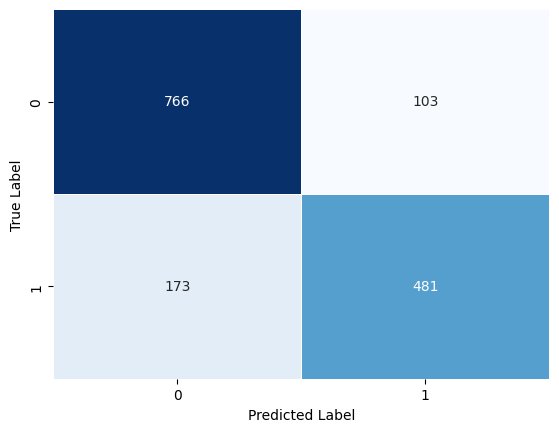

In [45]:
acc_bow1_logreg = c_report(y_valid,pred_bow1_logreg)
plot_cm(y_valid,pred_bow1_logreg)

Now training another Logistic Regression model with n-grams=2 and BoW 

In [46]:
model_bow2_logreg = LogisticRegression()
model_bow2_logreg.fit(X_train_bow2,y_train)
pred_bow2_logreg = model_bow2_logreg.predict(X_valid_bow2)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=2) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       869
           1       0.89      0.46      0.61       654

    accuracy                           0.74      1523
   macro avg       0.80      0.71      0.71      1523
weighted avg       0.78      0.74      0.72      1523

Accuracy : 0.7445830597504924


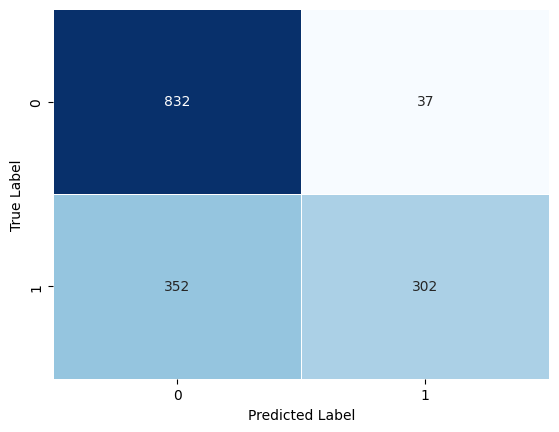

In [47]:
acc_bow2_logreg = c_report(y_valid,pred_bow2_logreg)
plot_cm(y_valid,pred_bow2_logreg)

We can observe that as n is increasing model accuracy is decreasing   
let's try to increase n one last time just to be sure

In [48]:
model_bow3_logreg = LogisticRegression()
model_bow3_logreg.fit(X_train_bow3,y_train)
pred_bow3_logreg = model_bow3_logreg.predict(X_valid_bow3)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=3) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       869
           1       0.92      0.34      0.49       654

    accuracy                           0.70      1523
   macro avg       0.79      0.66      0.64      1523
weighted avg       0.77      0.70      0.66      1523

Accuracy : 0.7032173342087984


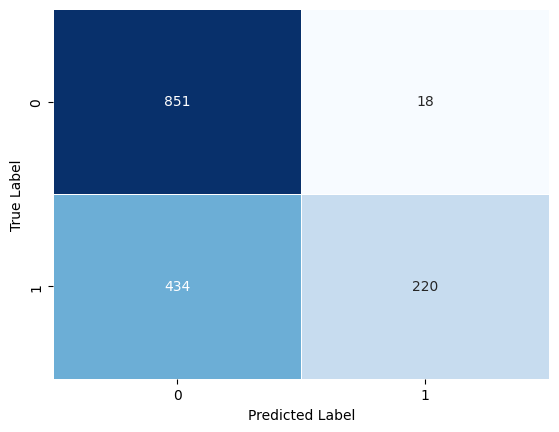

In [49]:
acc_bow3_logreg = c_report(y_valid,pred_bow3_logreg)
plot_cm(y_valid,pred_bow3_logreg)

From the above results it's clear that using n = 1 will always give us more accuray,  
now let's use tfidf approach with n = 1 to train our Logistic Regression model

In [50]:
model_tfidf1_logreg = LogisticRegression(C=1.0)
model_tfidf1_logreg.fit(X_train_tfidf1,y_train)
pred_tfidf1_logreg = model_tfidf1_logreg.predict(X_valid_tfidf1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       869
           1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.83      0.82      0.82      1523

Accuracy : 0.8220617202889035


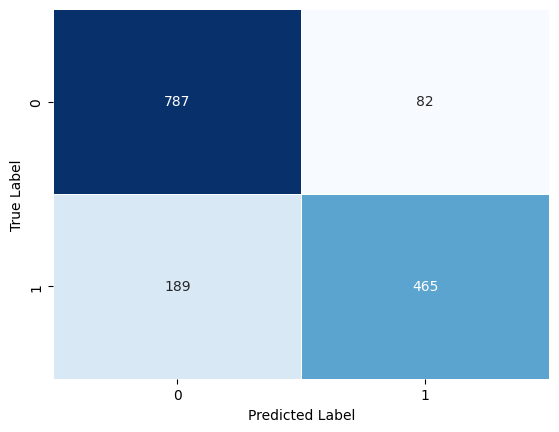

In [51]:
acc_tfidf1_logreg = c_report(y_valid,pred_tfidf1_logreg)
plot_cm(y_valid,pred_tfidf1_logreg)

From Logistic Regression we saw n-grams = 1 gives the best results 

##  Random Forest Classifier

In [52]:
model_tfidf1_RFC = RandomForestClassifier()
model_tfidf1_RFC.fit(X_train_tfidf1,y_train)
pred_tfidf1_RFC = model_tfidf1_RFC.predict(X_valid_tfidf1)

RandomForestClassifier()

Printing classification report and ploting confusion matrix for predictions of RandomForestClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.80      0.71      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy : 0.7997373604727511


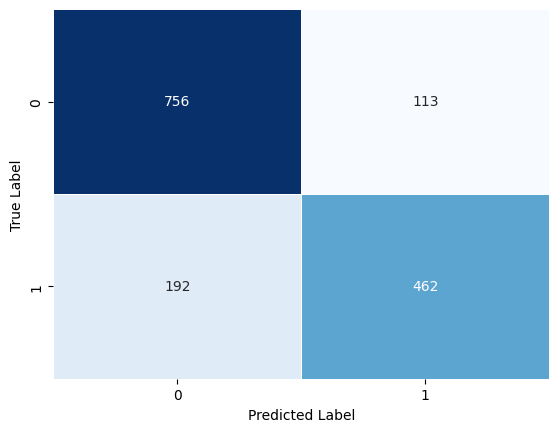

In [53]:
acc_tfidf1_RFC = c_report(y_valid,pred_tfidf1_RFC)
plot_cm(y_valid,pred_tfidf1_RFC)

## Support Vector CLassifier 


In [54]:
model_tfidf1_SVC = SVC(kernel='linear', degree=3, gamma='auto')
model_tfidf1_SVC.fit(X_train_tfidf1,y_train)
pred_tfidf1_SVC = model_tfidf1_SVC.predict(X_valid_tfidf1)

SVC(gamma='auto', kernel='linear')

Printing classification report and ploting confusion matrix for the SVC model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.83      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.82      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8220617202889035


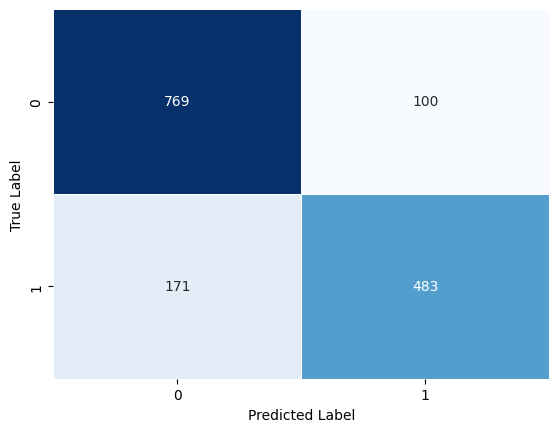

In [55]:
acc_tfidf1_SVC = c_report(y_valid,pred_tfidf1_SVC)
plot_cm(y_valid,pred_tfidf1_SVC)

In [63]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/99.8 MB 12.2 MB/s eta 0:00:09
   ---------------------------------------- 1.1/99.8 MB 11.3 MB/s eta 0:00:09
    --------------------------------------- 1.8/99.8 MB 12.8 MB/s eta 0:00:08
    --------------------------------------- 2.2/99.8 MB 12.6 MB/s eta 0:00:08
   - -------------------------------------- 2.5/99.8 MB 11.5 MB/s eta 0:00:09
   - -------------------------------------- 2.7/99.8 MB 10.8 MB/s eta 0:00:09
   - -------------------------------------- 3.0/99.8 MB 9.5 MB/s eta 0:00:11
   - -------------------------------------- 3.2/99.8 MB 8.8 MB/s eta 0:00:11
   - -------------------------------------- 3.3/99.8 MB 8.1 MB/s eta 0:00:12
   - --------------------

In [64]:
from xgboost import XGBClassifier

In [65]:
model_tfidf1_XGB = XGBClassifier(eval_metric='mlogloss')
model_tfidf1_XGB.fit(X_train_tfidf1,y_train)
pred_tfidf1_XGB = model_tfidf1_XGB.predict(X_valid_tfidf1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [69]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=4,
              num_parallel_tree=1, ...)

Classifictaion Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       869
           1       0.80      0.65      0.72       654

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Accuracy : 0.7820091923834537


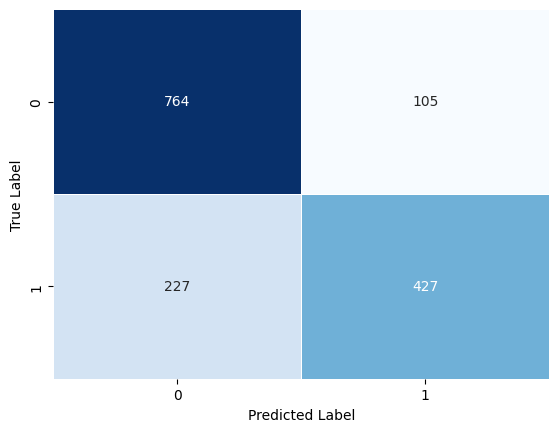

In [70]:
acc_tfidf1_XGB = c_report(y_valid,pred_tfidf1_XGB)
plot_cm(y_valid,pred_tfidf1_XGB)

In [71]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [72]:
max_words = 4000
max_len = 40
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [73]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model_lstm = Model(inputs=inputs,outputs=layer)
    return model_lstm

In [74]:
model_lstm = RNN()
model_lstm.summary()
model_lstm.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 50)            200000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [75]:
model_lstm.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
39/39 [==============================] - 6s 54ms/step - loss: 0.6717 - accuracy: 0.5757 - val_loss: 0.6590 - val_accuracy: 0.5780
Epoch 2/10
39/39 [==============================] - 1s 36ms/step - loss: 0.6069 - accuracy: 0.7016 - val_loss: 0.5688 - val_accuracy: 0.7118
Epoch 3/10
39/39 [==============================] - 1s 38ms/step - loss: 0.4649 - accuracy: 0.8021 - val_loss: 0.5082 - val_accuracy: 0.7767
Epoch 4/10
39/39 [==============================] - 2s 41ms/step - loss: 0.3726 - accuracy: 0.8440 - val_loss: 0.4656 - val_accuracy: 0.7849
Epoch 5/10
39/39 [==============================] - 2s 39ms/step - loss: 0.3205 - accuracy: 0.8664 - val_loss: 0.5225 - val_accuracy: 0.7824


In [77]:
test_sequences = tok.texts_to_sequences(X_train)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [83]:
accr = model_lstm.evaluate(test_sequences_matrix,y_train)

 42/191 [=====>........................] - ETA: 1s - loss: 0.2496 - accuracy: 0.9107

191/191 [==============================] - 1s 7ms/step - loss: 0.3125 - accuracy: 0.8739
